## Week 3

### Exercise:

- Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)
- Download the data of your choice.
- Practice data cleaning and preprocessing, handle missing values, outliers etc.
- Explore the basic statistics with pandas methods.
- Create visualizations to understand the distribution of variables.
- Identify correlations between variables using correlation matrices and/or heatmaps.
- Derive insights from your analysis. What interesting patterns or trends did you discover?

### Notes:
- The goal is to gain insights into the data and present your findings through meaningful visualizations.
- Document your analysis and include code comments to explain each step of the analysis.
- Create visualizations with clear labels and titles.
- Summarize your findings in a informative manner.


### Solution:

In [6]:
# Your code goes here
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_url = "C:/Users/oztur/deneme-folder/ada-lovelace-academy/data/"
df_url = base_url + "house-prices/train.csv"

In [4]:
df = pd.read_csv(df_url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Display basic statistics of numerical columns
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values, for instance, by dropping columns with a high percentage of missing values
threshold = 0.7 * len(df)  # 70% threshold for missing values
df_cleaned = df.dropna(thresh=threshold, axis=1)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


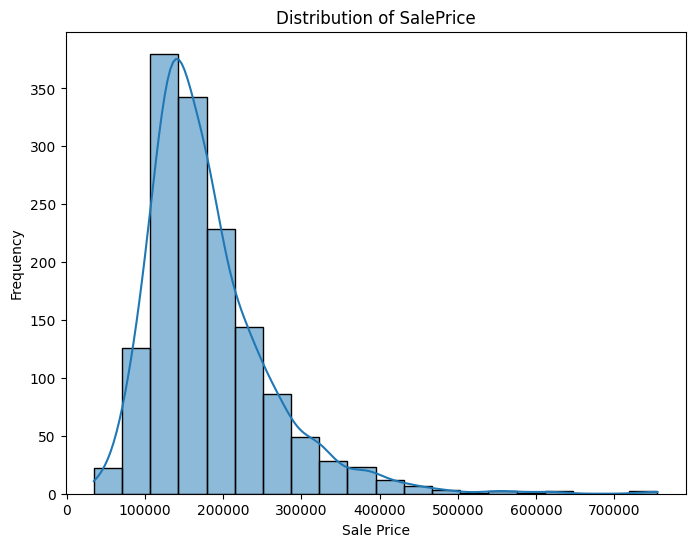

In [13]:
# Visualizing the distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, bins=20)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


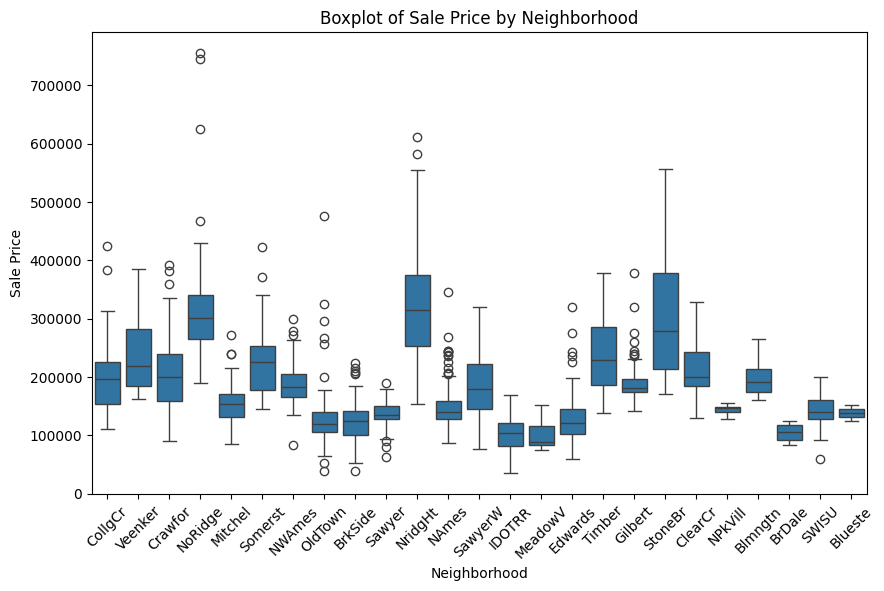

In [18]:
# Select a categorical variable for boxplot
categorical_variable = 'Neighborhood' 

plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_variable, y='SalePrice', data=df)
plt.title(f'Boxplot of Sale Price by {categorical_variable}')
plt.xticks(rotation=45)
plt.xlabel(categorical_variable)
plt.ylabel('Sale Price')
plt.show()

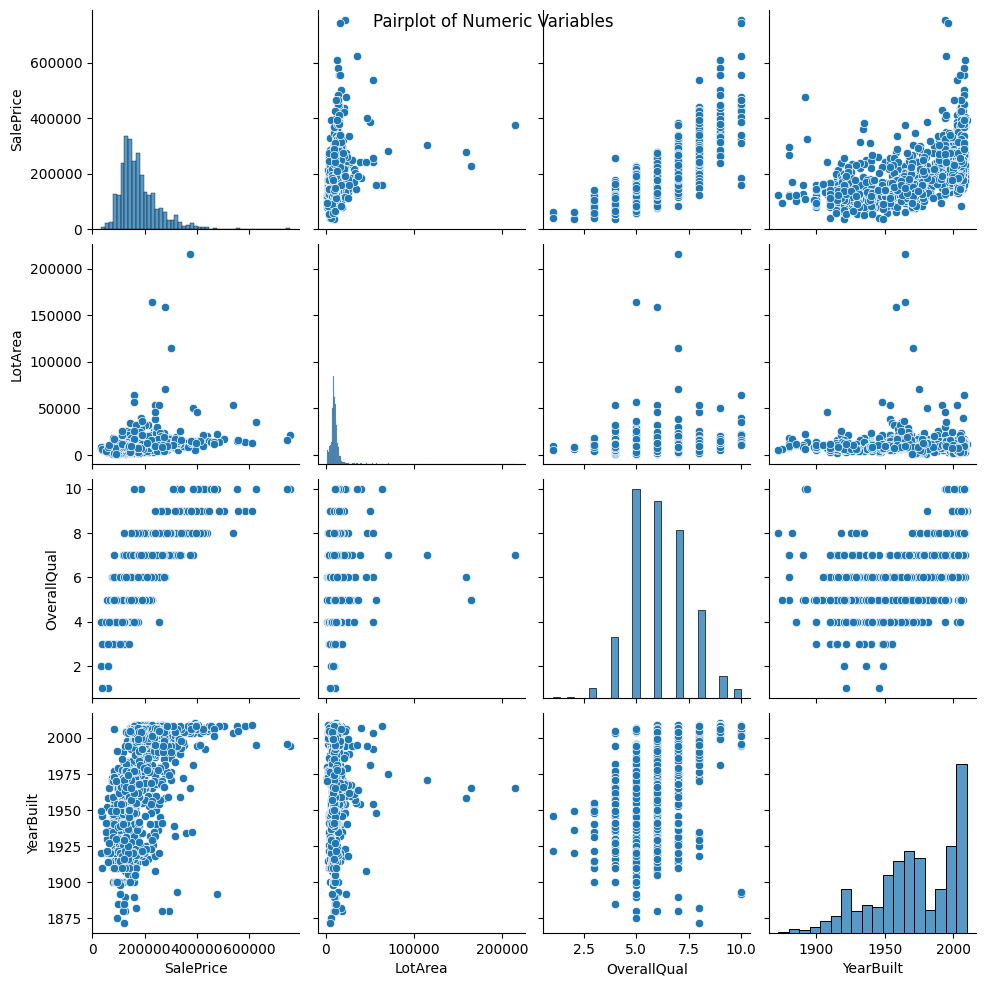

In [19]:
# Select numeric columns for pairplot (considering a subset for readability)
numeric_columns_subset = ['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt']  # Change as needed

sns.pairplot(df[numeric_columns_subset])
plt.suptitle('Pairplot of Numeric Variables')
plt.show()

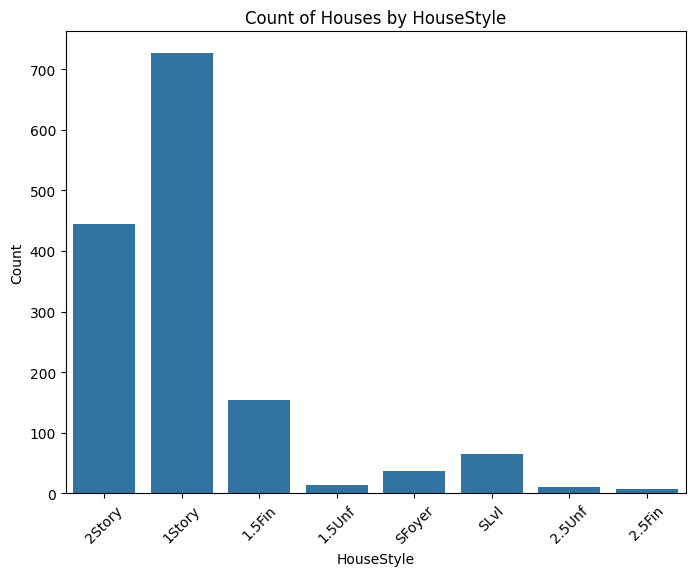

In [20]:
# Select a categorical variable for countplot
categorical_variable = 'HouseStyle' 
plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_variable, data=df)
plt.title(f'Count of Houses by {categorical_variable}')
plt.xlabel(categorical_variable)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

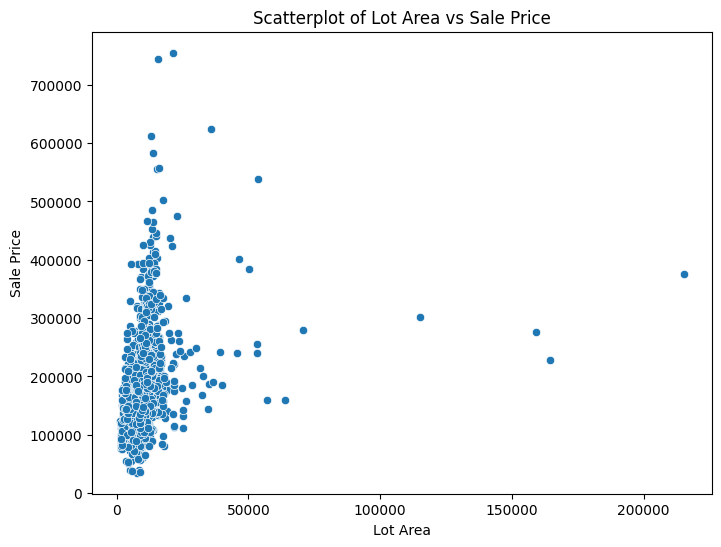

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Scatterplot of Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

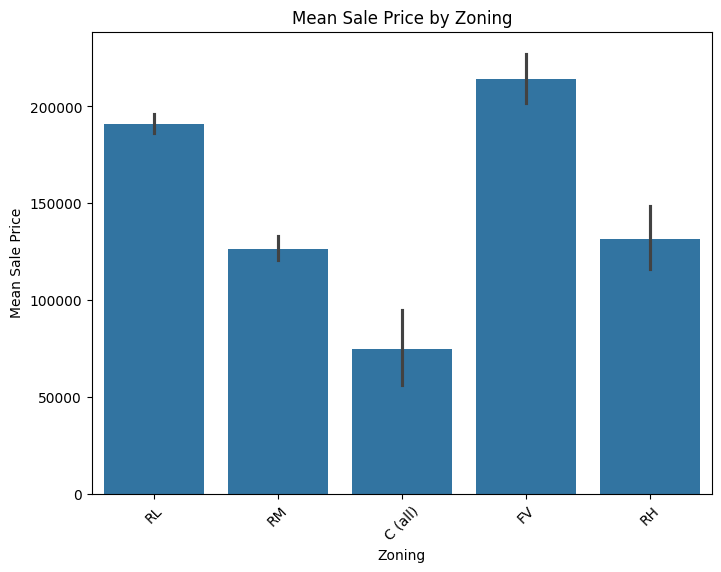

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x='MSZoning', y='SalePrice', data=df, estimator=np.mean)
plt.title('Mean Sale Price by Zoning')
plt.xlabel('Zoning')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=45)
plt.show()

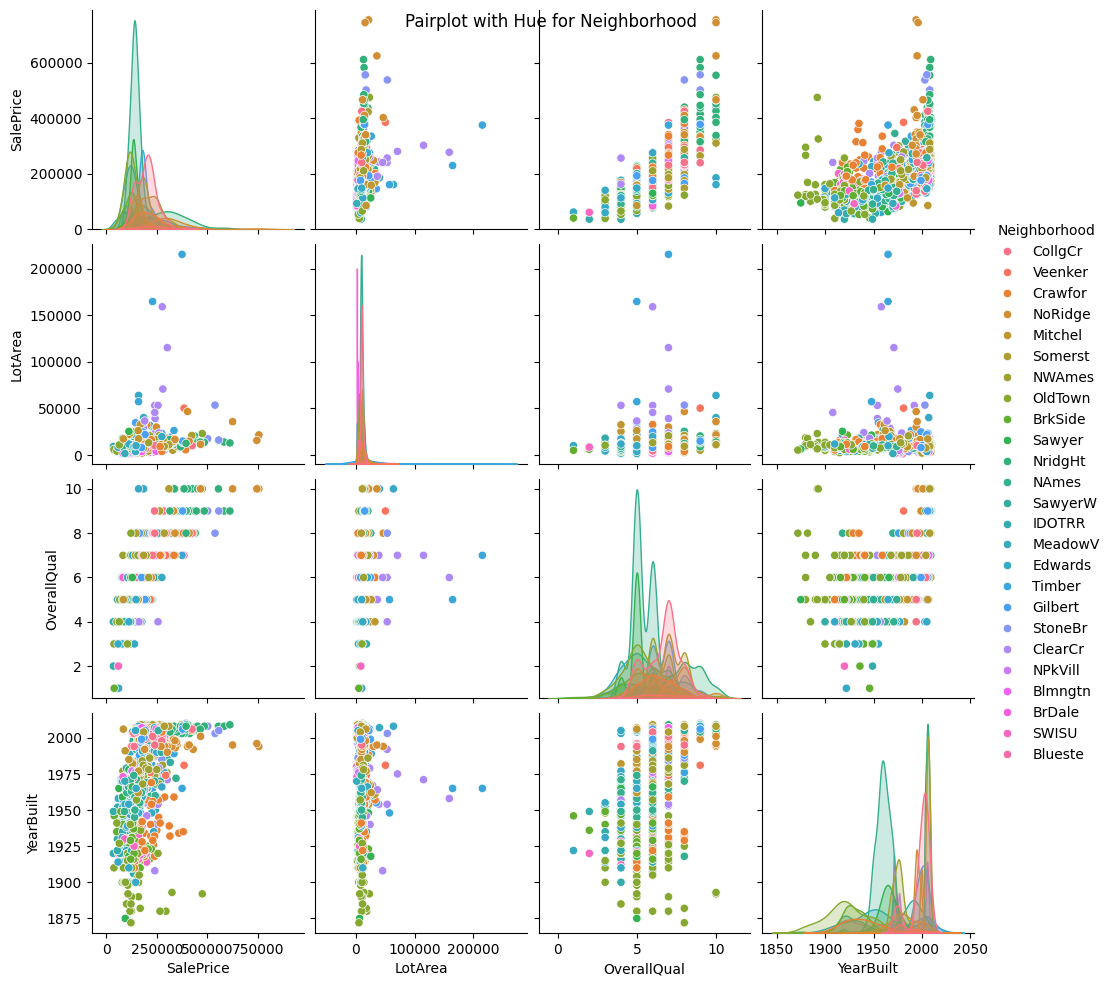

In [24]:
# Consider numerical and categorical columns of interest
columns_of_interest = ['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt', 'Neighborhood'] 

sns.pairplot(df[columns_of_interest], hue='Neighborhood', height=2.5)
plt.suptitle('Pairplot with Hue for Neighborhood')
plt.show()

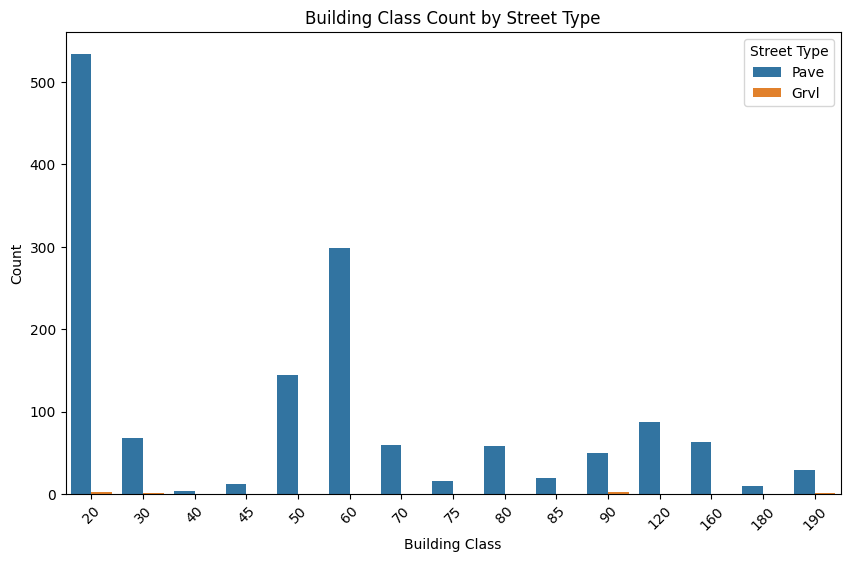

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MSSubClass', hue='Street', data=df)
plt.title('Building Class Count by Street Type')
plt.xlabel('Building Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Street Type')
plt.show()

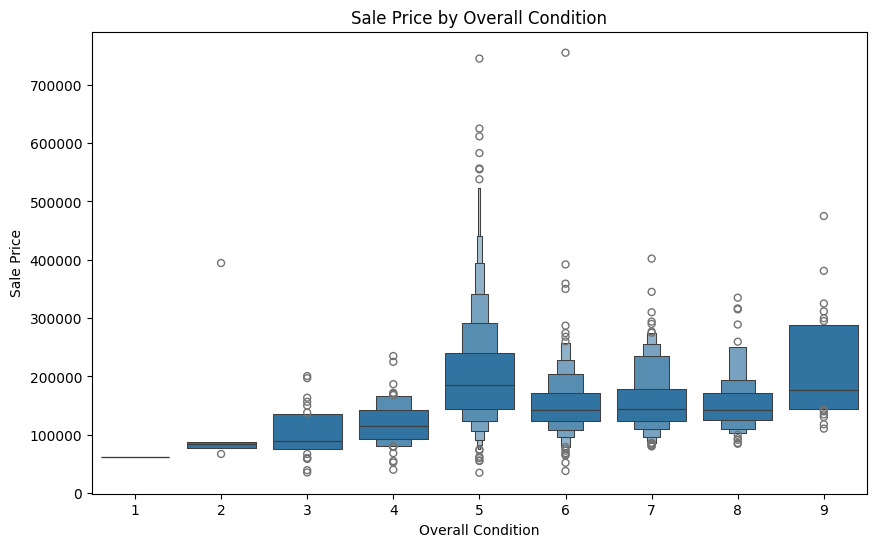

In [26]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Sale Price by Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()

C:\Users\oztur\AppData\Local\Temp\ipykernel_21776\2125555514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SaleCondition', data=df, palette='husl')


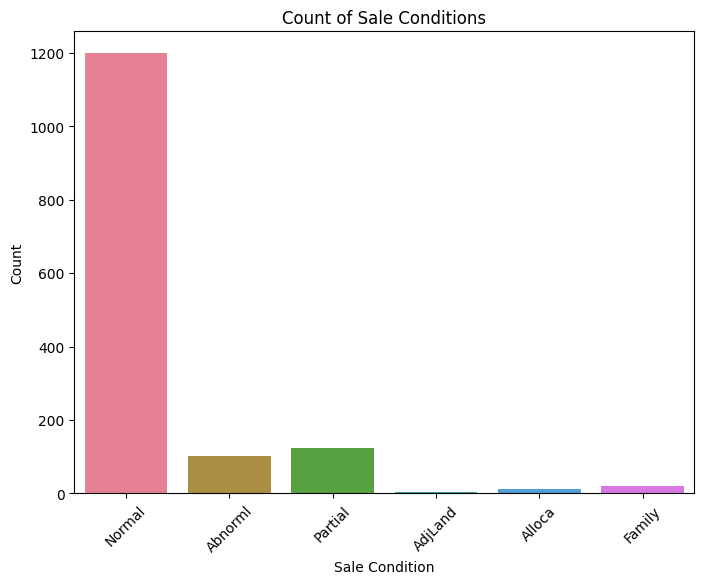

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SaleCondition', data=df, palette='husl')
plt.title('Count of Sale Conditions')
plt.xlabel('Sale Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

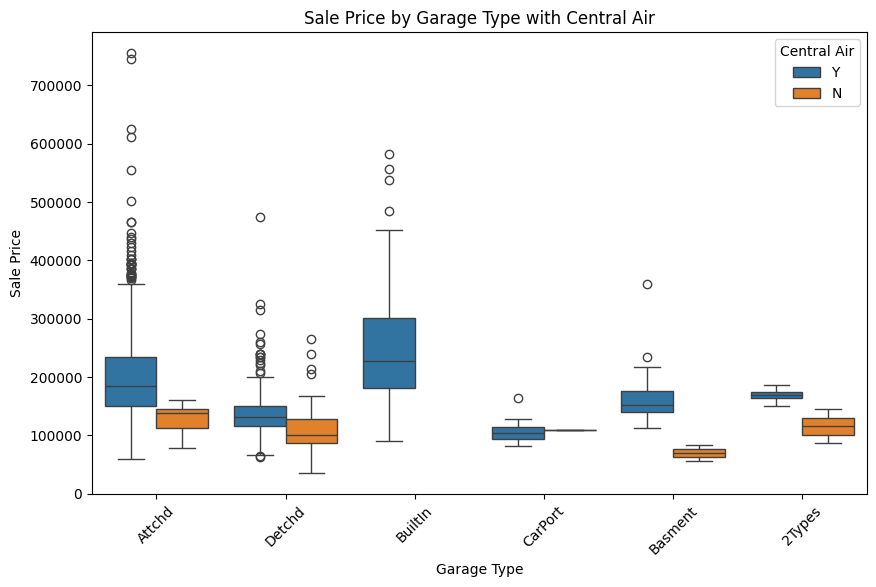

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageType', y='SalePrice', hue='CentralAir', data=df)
plt.title('Sale Price by Garage Type with Central Air')
plt.xlabel('Garage Type')
plt.ylabel('Sale Price')
plt.legend(title='Central Air', loc='upper right')
plt.xticks(rotation=45)
plt.show()